# Movie Analysis

> Business Problem:Microsoft has decided to create a new movie studio. Microsoft wants to know what types of films are currently doing the best at the box office to help decide what type of films to create.

## Load Data and Packages

In [2]:
# importing packages
import pandas as pd
# setting pandas display to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Using Revenue numbers, title, and year
df_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
#Using tconst(ID), genres, primary_title, runtime_minutes
df_titles = pd.read_csv('data/imdb.title.basics.csv.gz')
#Using tconst(ID), ratings, numvotes
df_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
# 
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz')

## Data Exploration

In [25]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
df_budget.loc[df_budget['movie'] == 'Avatar']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [34]:
df_gross[df_gross['title'].str.contains('Avatar')]


,title,studio,domestic_gross,foreign_gross,year
128,Avatar: Special Edition,Fox,10700000.00,22500000,2010


In [36]:
df_gross[df_gross['title'].str.contains('Dark Phoenix')]


,title,studio,domestic_gross,foreign_gross,year


In [3]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [4]:
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [5]:
df_gross.describe()

,domestic_gross,year
count,3359.00,3387.00
mean,28745845.07,2013.96
std,66982498.24,2.48
min,100.00,2010.00
25%,120000.00,2012.00
50%,1400000.00,2014.00
75%,27900000.00,2016.00
max,936700000.00,2018.00


In [45]:
df_title.head(14)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,nan,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,nan,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.00,Biography


In [7]:
df_title.describe()

,start_year,runtime_minutes
count,146144.00,114405.00
mean,2014.62,86.19
std,2.73,166.36
min,2010.00,1.00
25%,2012.00,70.00
50%,2015.00,87.00
75%,2017.00,99.00
max,2115.00,51420.00


In [ ]:

sns.countplot(x='genres', data=df_title)
plt.title('Number of Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16, limit = 5000)
plt.xlabel('Genre', fontsize=16)


In [10]:
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [11]:
df_ratings.describe()

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


In [12]:
df_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

## Data Preparation

### To dos:
- df_gross
 - Convert foreign_gross revenue numbers to float so they can be manipulated as a number
 - Create a total_gross column

- df_title
 - Reassign movies to all related genres
 - Merge df_titles and df_ratings into the same df
 
- df_ratings
- df_budget
  - Create profit column
### Future Analysis Goals: 
- Revenues by genre
- Ratings by genre
- Revenues by genre
- Ratings by Runtime


In [4]:
#Remove commas from df_gross['foreign_gross'] and convert to float, so gross columns can be combined
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(",","").astype(float)
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [5]:
#Create total_gross column in df_gross
df_gross['total_gross'] = df_gross['foreign_gross'] + df_gross['domestic_gross']
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00
3,Inception,WB,292600000.00,535700000.00,2010,828300000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00


In [6]:
#Float error when using make_genre_columns function so made sure everything in genres was a string
df_titles['genres'] = df_titles['genres'].astype(str)

In [7]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):
    '''Creates a new DataFrame of a column for each genres from the genres column. 
    Input:
        dataframe: Original DataFrame
        genres_col_name: Name of the column of genres (values look like "Action,Adventure")
        drop_genres_col: Flag to drop the original genres column
    Returns:
        A copy of the original DataFrame with a column for each genres from the genres column
    '''
    ## Get list of unique genres
    # Join all the (unique) genres values into one big string
    list_all_genres = ','.join(dataframe[genre_col_name].unique())
    # Get a set of all unique genres (no duplicates)
    unique_genres = set(list_all_genres.split(','))
    ## Create new columns with the genres & populate with 0 & 1
    # Make a safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    # Drop the unused `genre_col_name` column
    if drop_genres_col:
        new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe

In [8]:
df_titles_new = make_genre_columns(df_titles)
df_titles_new.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,War,Drama,Sport,Reality-TV,Adventure,...,News,Crime,Fantasy,Biography,Action,Family,Music,Sci-Fi,Game-Show,History
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
list_all_genres = ','.join(df_titles['genres'].unique())
unique_genres = list(set(list_all_genres.split(',')))
print(unique_genres)

['War', 'Drama', 'Sport', 'Reality-TV', 'Adventure', 'Animation', 'Documentary', 'nan', 'Talk-Show', 'Thriller', 'Musical', 'Adult', 'Romance', 'Comedy', 'Mystery', 'Short', 'Horror', 'Western', 'News', 'Crime', 'Fantasy', 'Biography', 'Action', 'Family', 'Music', 'Sci-Fi', 'Game-Show', 'History']


In [10]:
#Merge df_titles_new with df_ratings
df_imbd = df_titles_new.merge(df_ratings, left_on='tconst', right_on='tconst')
df_imbd.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,War,Drama,Sport,Reality-TV,Adventure,...,Fantasy,Biography,Action,Family,Music,Sci-Fi,Game-Show,History,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,0,1,0,0,0,...,0,0,1,0,0,0,0,0,7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,0,1,0,0,0,...,0,1,0,0,0,0,0,0,7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,6.50,119


## Data Analysis

In [36]:
column_names=['genre','mean_rating', 'count_titles', 'avg_num_votes', 'avg_runtime','avg_year']
my_dict = {}
i = 0
for genre in unique_genres:
    df_genre = df_imbd[df_titles_new[genre] == 1]
    m = df_genre['averagerating'].mean()
    c = df_genre['tconst'].count()
    d = df_genre['numvotes'].mean()
    t = df_genre['runtime_minutes'].mean()
    y = df_genre['start_year'].mean()

    my_dict[i] = [genre, m,c,d,t,y]
    i = i +1

print(my_dict)
df_summary = pd.DataFrame.from_dict(my_dict, orient='index',
                       columns=column_names)



<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning

{0: ['War', 6.2986876640419895, 762, 3267.9658792650916, 92.63702623906705, 2014.3162729658793], 1: ['Drama', 6.322183073528401, 28098, 3475.7787031105418, 93.36068240428486, 2014.2268488860418], 2: ['Sport', 6.297085020242913, 1235, 2850.3133603238866, 95.02452316076294, 2014.5344129554655], 3: ['Reality-TV', 6.14, 30, 1850.4666666666667, 92.51724137931035, 2015.3333333333333], 4: ['Adventure', 6.325748051294936, 3977, 3334.0985667588634, 93.25007032348805, 2014.310284133769], 5: ['Animation', 6.303021370670603, 1357, 4279.861459100958, 94.14888337468983, 2013.969786293294], 6: ['Documentary', 6.347827989497988, 25138, 2923.295170657968, 94.21889595658556, 2014.5254992441721], 7: ['nan', 6.2983798882681565, 1790, 6690.832960893855, 94.64651449722393, 2013.6240223463687], 8: ['Talk-Show', 6.3875, 16, 15856.625, 95.93333333333334, 2015.3125], 9: ['Thriller', 6.368443157132497, 6905, 3000.237074583635, 93.70123336579033, 2014.2175235336713], 10: ['Musical', 6.363538873994634, 746, 2607.7

<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_genre = df_imbd[df_titles_new[genre] == 1]
<ipython-input-36-8d916f4ab105>:5: UserWarning

In [41]:
df_summary['percent_titles'] =1.0*df_summary['count_titles']/df_summary['count_titles'].sum()

In [42]:
df_summary

,genre,mean_rating,count_titles,avg_num_votes,avg_runtime,avg_year,percent_titles
0,War,6.30,762,3267.97,92.64,2014.32,0.01
1,Drama,6.32,28098,3475.78,93.36,2014.23,0.22
2,Sport,6.30,1235,2850.31,95.02,2014.53,0.01
3,Reality-TV,6.14,30,1850.47,92.52,2015.33,0.00
4,Adventure,6.33,3977,3334.10,93.25,2014.31,0.03
5,Animation,6.30,1357,4279.86,94.15,2013.97,0.01
6,Documentary,6.35,25138,2923.30,94.22,2014.53,0.19
7,nan,6.30,1790,6690.83,94.65,2013.62,0.01
8,Talk-Show,6.39,16,15856.62,95.93,2015.31,0.00
9,Thriller,6.37,6905,3000.24,93.70,2014.22,0.05


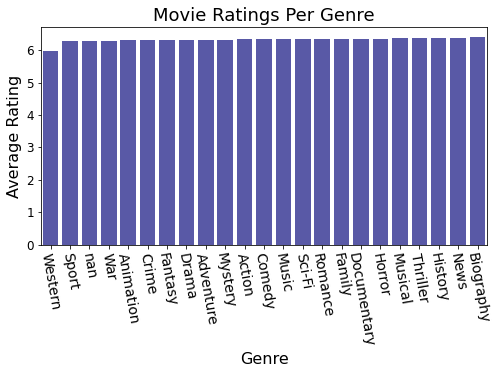

In [33]:
df_graph = df_summary[df_summary['count_rating']> 100].sort_values(by=['mean_rating'],ascending = True)
plt.figure(figsize=(8,4))
sns.barplot(data=df_graph, x='genre',y='mean_rating', color="blue", saturation=.3)
plt.title('Movie Ratings Per Genre', fontsize=18)
plt.ylabel('Average Rating', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);

Viewer ratings per genre are very similar with the exception of a slightly lower rating for Westerns. There could be a selection bias here because only individuals which have decided to watch a movie will provide a rating.

## Summary